In [90]:
import pandas as pd
# pd.set_option('max_colwidth', 100)
df = pd.read_csv('data/output/resume_summary.csv')
df.columns

Index(['index', 'file_path', 'extension', 'text', 'Language', 'Work',
       'Summaries', 'Skill', 'Member', 'Writing', 'Researching', 'Honor',
       'Activity', 'company_foodbev', 'company_other', 'Education',
       'Extracurriculars'],
      dtype='object')

In [91]:
df.company_other[df.company_other == df.company_other]

1                                {' ITT '}
17                     {'JP Morgan Chase'}
39      {'Liberty Mutual Insurance Group'}
80                       {'Iron Mountain'}
98                              {'Intuit'}
266                           {'L Brands'}
333                             {'Intuit'}
608                              {'Itron'}
646                     {'Kelly Services'}
651                              {'Macys'}
684                             {'Intuit'}
771                             {'Kemper'}
878                             {'Kroger'}
899                    {'Lockheed Martin'}
982                    {'JP Morgan Chase'}
1005                   {'JP Morgan Chase'}
1006                   {'JP Morgan Chase'}
1008                   {'JP Morgan Chase'}
1011                   {'JP Morgan Chase'}
Name: company_other, dtype: object

In [13]:
df = pd.read_csv('data/output/resume_summary.csv')
df = df.Work
df.dropna(inplace=True)
df = df.apply(lambda word: word.replace('\n',' '))
# import re
# df = df.apply(lambda word: re.sub('[^A-Za-z0-9. ]', '', word))

In [15]:
df[0]

' CURRENT ROLE: Content Marketing Coordinator Healthiest State Initiative, June 2018 – Present Lead the creation and execution of content  initiatives to increase awareness of programs,  events and partner organizations, including:  • Manage content calendar and social media • Write blog posts to tell HSI success stories • Design collateral materials and resources • Write and send press releases  • Collaborate with non- and for-profit partners  • Photography and video production   PREVIOUS ROLES: Digital Producer, The Des Moines Register News Assistant, CNN Washington D.C. Digital Desk Assistant, PBS NewsHour  CURRENT & PAST'

In [909]:
# i = 19 and 26 both incorrectly pulling associate degrees

In [3]:
i = -1
i = i+1
i

0

In [4]:
#dont show nas
df.iloc[i]#[df.iloc[i] == df.iloc[i]]

index                                                                        0
file_path                         ../data/input/resumes/VolunteerResume_LK.pdf
extension                                                                 .pdf
text                         Lauren Kollauf\n\nContent Creator & Nonprofit ...
Language                                                                   NaN
Work                         \nCURRENT ROLE:\nContent Marketing Coordinator...
Summaries                    T ME:\nAfter spending more than five years in ...
Skill                                                                      NaN
Member                                                                     NaN
Writing                                                                    NaN
Researching                                                                NaN
Honor                                                                      NaN
Activity                      VOLUNTEER ROLES:\nPowe

In [932]:
df.major_minor[i]

"{'Journalism', 'Communication'}"

In [933]:
df.Education[i].replace('\n','')

'EDUCATION & CERTIFICATIONS:Drake University, May 2013Bachelor of Arts, Summa Cum LaudeSchool of Journalism & Mass Communication200-hour Registered Yoga Teacher, April 2017CONTACT ME: (563) 495-0357 lauren@iowahealthieststate.com/Lauren-Kollauf\x0c'

In [914]:
## print everything with headers
# for col in df.columns[4:]:
#     if df[col].iloc[i] != df[col].iloc[i]:
#         pass
#     else:
#         print(col,'\n',df[col].iloc[i],'\n\n-----------------\n\n')

In [865]:
## See if something prints
# myLIST = ['Associate of Arts','A.A.'," AA ",
#           'Associate of Science', 'A.S.'," AS ",
#           'Associate of Applied Science','A.A.S.'," AAS "]

# for item in myLIST:
#     if item in df.Education[i].replace('\n',''):
#         print(item)

In [96]:
# for i in df.Member[df.Member == df.Member]:
#     print(re.sub(' +',' ',i.replace('\\n','. ').replace('\n','. ')))
#     print('\n')

# spaCy

In [26]:
import re
import spacy
from spacy import displacy
from scipy import spatial
# nlp = spacy.load("en_core_web_sm") #smaller model
nlp = spacy.load("en_core_web_lg") #larger model

def detectEntities(doc): # document level entities
    for ent in doc.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
    displacy.render(doc, style='ent', jupyter=True)

def detectSentences(doc): # document level sentences
    for sent in doc.sents:
        print("Sentence: ", sent)

In [107]:
x = df.Work[df.Work == df.Work]
resumes = x.apply(lambda word: re.sub('[^A-Za-z0-9. ]', '', word))
resumes.head()

0    CURRENT ROLEContent Marketing CoordinatorHealthiest State Initiative June 2018  PresentLead the ...
1    EXPERIENCE  Company  Armstrong Asset management Pte. Ltd. From Aug 2017 to date   Nature of the ...
2    EXPERIENCE  Mar 2014  Present UOB Asset Management Ltd UOBAM Product Development  Marketing Comm...
3    WORK EXPERIENCE Northwestern University                                                         ...
4    EXPERIENCE  The Des Moines Register  Des Moines Iowa Producer  January 2015  Present    Serve as...
Name: Work, dtype: object

In [110]:
doc = nlp(resumes[6])
displacy.render(doc, style='ent', jupyter=True)

In [98]:
# for num in range(0,60):
#     try:
#         input_string = re.sub('[;-]', ',',df.Summaries[num].replace('\n',' '))
#         input_string = re.sub('[_]', ' ',input_string)
#         input_string = re.sub(' +', ' ',input_string)
#         print('\n')
#         print(input_string)
#         doc = nlp(input_string) 
#         doc_entities = doc.ents 
#         for i in doc_entities:
#         #     if i.label_ == 'PERSON':
#             print(i, '   ', i.label_)
#     except:
#         pass

In [578]:
university_list = set()
for i in df.index:
    if df.Member[i] == df.Member[i]:

        doc = nlp(str(df.Edu[i]).replace('\\n', '. ').replace('\n', '. '))
        doc_entities = doc.ents
        doc_persons = filter(lambda x: x.label_ == 'ORG', doc_entities)
        doc_persons = filter(lambda x: len(x.text.strip().split()) >= 2, doc_persons)
        doc_persons = map(lambda x: x.text.strip(), doc_persons)
        doc_persons = list(doc_persons)
        for j in doc_persons:
            university_list.add(j)

In [579]:
import numpy as np
x = np.array(list(university_list))
x = pd.DataFrame(np.sort(x))

In [97]:
# x

https://spacy.io/api/annotation#named-entities
TYPE - DESCRIPTION     
PERSON - People, including fictional.     
NORP - Nationalities or religious or political groups.     
FAC - Buildings, airports, highways, bridges, etc.     
ORG - Companies, agencies, institutions, etc.     
GPE - Countries, cities, states.     
LOC - Non-GPE locations, mountain ranges, bodies of water.     
PRODUCT - Objects, vehicles, foods, etc. (Not services.)     
EVENT - Named hurricanes, battles, wars, sports events, etc.     
WORK_OF_ART - Titles of books, songs, etc.     
LAW	Named - documents made into laws.          
LANGUAGE - Any named language.     
DATE - Absolute or relative dates or periods.     
TIME - Times smaller than a day.     
PERCENT - Percentage, including ”%“.     
MONEYvMonetary values, including unit.     
QUANTITY - Measurements, as of weight or distance.     
ORDINAL - “first”, “second”, etc.     
CARDINAL - Numerals that do not fall under another type.     

## To look at sections of the YAML file:

In [1]:
# import yaml

# with open('/Users/anneitrheim/PycharmProjects/Capstone/confs/config.yaml', 'r') as stream:
#     try:
#         data_loaded = yaml.safe_load(stream)
#     except yaml.YAMLError as exc:
#         print(exc)

In [3]:
# import pandas as pd
# df = pd.DataFrame()
# for i in data_loaded['extractors']['universities']:
#     if type(i) == list:
#         df = df.append(pd.Series(i), ignore_index=True)
#     else:
#         df = df.append(pd.Series(i), ignore_index=True)

In [19]:
# df.columns = ['one', 'two', 'three']
# df.head(6)

## For word2vec on the resumes we have in our repo:

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/output/resume_summary.csv')
df.drop(['extension'], axis=1, inplace=True)

In [2]:
import nltk
# nltk.download()
from gensim.models import Word2Vec
import multiprocessing
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import sys
import re

In [3]:
# stop_words = set(stopwords.words('english'))
   
# def remove_stop_words(x):
#     try:
  
#         x = x.replace('___',' ')
#         x = x.replace('\n',' ')
#         x = x.replace('\r',' ')
#         x = x.replace('\t',' ')
#         x = x.replace('\s',' ')

#         x = re.sub('[^A-Za-z0-9. ]', '', x)
        
#         word_tokens = word_tokenize(x)
#         filtered_sentence = [w for w in word_tokens if not w in stop_words]
#         return ' '.join(filtered_sentence)
#     except:
#         print(x.values)
#         sys.exit(1)

In [4]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
resumes = df.text.apply(lambda word: re.sub('[^A-Za-z0-9. ]', '', word))
# store as list of lists of words
resumes_ted = []
for sent_str in resumes:
    tokens = re.sub(r"[^a-z0-9]+", " ", sent_str.lower()).split()
    resumes_ted.append(tokens)

In [5]:
EMB_DIM=300
w2v=Word2Vec(resumes_ted, #the list of split resumes
             size=EMB_DIM, #the dimensionality of the embedding vector
             window=5, #Maximum distance between the current and predicted word within a sentence
             min_count=3, #Ignores all words with total frequency lower than this (to keep only valid real words)
             negative=15, #Negative sampling will be used, the int for negative specifies how many “noise words” should be drawn (usually between 5-20)
             iter=20, #Number of iterations (epochs) over the corpus
             workers=multiprocessing.cpu_count()) #number of threads being used
vectors=w2v.wv

In [6]:
# import numpy as np
# import matplotlib.pyplot as plt

# def display_closestwords_tsnescatterplot(model, word):
    
#     arr = np.empty((0,300), dtype='f')
#     word_labels = [word]

#     # get close words
#     close_words = model.similar_by_word(word)
    
#     # add the vector for each of the closest words to the array
#     arr = np.append(arr, np.array([model[word]]), axis=0)
#     for wrd_score in close_words:
#         wrd_vector = model[wrd_score[0]]
#         word_labels.append(wrd_score[0])
#         arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
#     # find tsne coords for 2 dimensions
#     tsne = TSNE(n_components=2, random_state=0)
#     np.set_printoptions(suppress=True)
#     Y = tsne.fit_transform(arr)

#     x_coords = Y[:, 0]
#     y_coords = Y[:, 1]
#     # display scatter plot
#     plt.scatter(x_coords, y_coords)

#     for label, x, y in zip(word_labels, x_coords, y_coords):
#         plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
#     plt.xlim(x_coords.min()+0.5, x_coords.max()+0.5)
#     plt.ylim(y_coords.min()+0.5, y_coords.max()+0.5)
#     plt.show()
    
# display_closestwords_tsnescatterplot(w2v, 'university')

In [7]:
vectors.most_similar(positive=['university'])

[('drake', 0.9782220125198364),
 ('des', 0.9602786898612976),
 ('ia', 0.9550535678863525),
 ('moines', 0.9545453786849976),
 ('education', 0.9518246650695801),
 ('iowa', 0.9390984177589417),
 ('sciences', 0.9376882314682007),
 ('college', 0.9356263279914856),
 ('bachelor', 0.912489652633667),
 ('arts', 0.8947751522064209)]

In [8]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
Y = tsne.fit_transform(w2v.wv.vectors)

<Figure size 800x600 with 1 Axes>

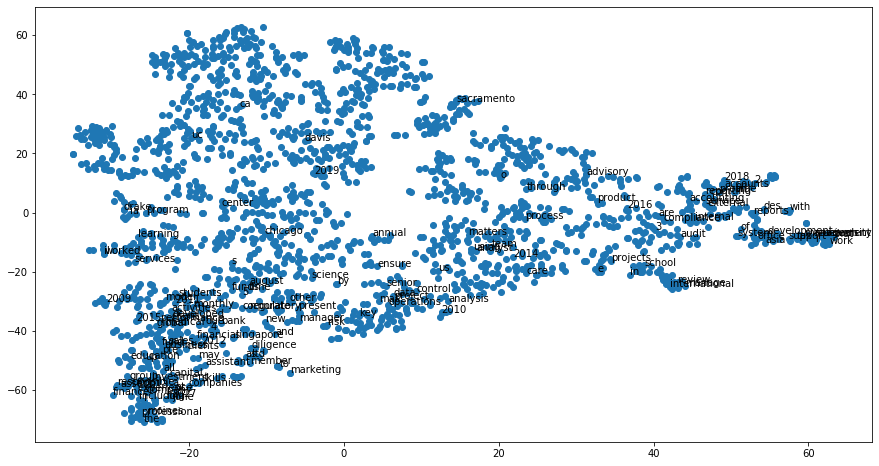

In [25]:
plt.figure(figsize=(15, 8))
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(w2v.wv.vocab, Y[:, 0], Y[:, 1]):
    if w2v.wv.vocab[label].count > 30:
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [9]:
#cooler way
#https://github.com/anvaka/word2vec-graph

## Looking to see if it parsed correctly:

In [ ]:
# pd.set_option('max_colwidth', 100)

In [159]:
import pandas as pd
df1 = pd.read_csv('data/output/resume_summary.csv')
# df1.drop(['extension'], axis=1, inplace=True)

# import re
# def remove_stop_words(x):
#     x = str(x)
#     x = x.replace('___',' ')
#     x = x.replace('\n',' ')
#     x = x.replace('\r',' ')
#     x = x.replace('\t',' ')
#     x = x.replace('\s',' ')
#     x = x.replace('   ',' ')
#     return x

# # df1['text']=df1['text'].apply(remove_stop_words)
# df1['Language']=df1['Language'].apply(remove_stop_words)
# df1['Edu']=df1['Edu'].apply(remove_stop_words)
# df1['Work']=df1['Work'].apply(remove_stop_words)
# df1['Summaries']=df1['Summaries'].apply(remove_stop_words)
# df1['Skill']=df1['Skill'].apply(remove_stop_words)
# df1['Member']=df1['Member'].apply(remove_stop_words)
# df1['Writing']=df1['Writing'].apply(remove_stop_words)
# df1['Researching']=df1['Researching'].apply(remove_stop_words)
# df1['Honor']=df1['Honor'].apply(remove_stop_words)
# df1['Activity']=df1['Activity'].apply(remove_stop_words)
# df1['Curriculars']=df1['Curriculars'].apply(remove_stop_words)

In [25]:
x = df1.iloc[35]
pd.DataFrame(x)

,35
file_path,../data/input/resumes/Omar Resume 6.2019 wigg.pdf
text,"220 E. Illinois | Chicago, IL 60661 | 617-955-..."
ProfessionalTraining,NaN
Language,"LANGUAGES Technical: R, Python, VBA, SQL, MS..."
Edu,"EDUCATION University of Chicago | Chicago, IL..."
Work,"PROFESSIONAL EXPERIENCE NIMBL, Techedge Gr..."
Summaries,nan
Skill,SKILLS AND
Member,nan
Writing,nan


In [36]:
x.text

'220 E. Illinois | Chicago, IL 60661 | 617-955-7304 | oalshaye@uchicago.edu \n\nOmar ALShaye \n\n \n\nEDUCATION \n\n \n\nUniversity of Chicago | Chicago, IL                                                                                            Expected Winter 2020 \nMaster of Science in Analytics, Data Science \n\n▪  Coursework: Statistical Analysis, Machine Learning, Optimization, Deep Learning, Data Mining, \n\nBusiness Applications, Data Engineering Platforms, Non-Linear Models, Big Data, Time Series \n\n \nRensselaer Polytechnic Institute | Troy, NY                                                                                              May 2018 \nDual Bachelors of Science in Industrial Management Engineering – Economics                   \n\n▪  Honors: Cum Laude, Rensselaer Founders Award of Excellence, Ray Palmer Baker Prize for Excellence in \n\nSystems Engineering, Alpha Pi Mu Honors Society Certificate of Excellence in Industrial Engineering  \n\n \n\n \nPROFESSIONAL E

# Cleaning up Kaggle data

In [63]:
# kaggle = pd.read_csv('~/PycharmProjects/Resume-Parser/data/input/resumes/Kaggle_resume_dataset.csv', usecols=[0, 1, 2])

In [116]:
# kaggle.to_csv('~/PycharmProjects/Resume-Parser/data/input/resumes/Kaggle_resume_dataset.csv', index=False)

In [207]:
import os
os.path.getsize('data/input/resumes/Kaggle_resume_dataset.csv')

5171348

In [855]:
# pd.set_option('max_colwidth', 100)

In [206]:
# import random
# kaggle.text[random.randint(0, len(kaggle))]

In [204]:
# for i in kaggle.index:
#     if kaggle.text.loc[i].find('PROFESSIONAL ACTIVITIES') != -1:
#         print(i)

In [205]:
# counts = 0
# for i in kaggle.index:
#     if kaggle.text.loc[i].lower().find('\\xa8') != -1:
#         kaggle.text.loc[i] = kaggle.text.loc[i].replace('\\xa8', '')
#         counts = counts + 1
# print(counts)

In [88]:
# kaggle.drop(830, axis=0, inplace=True)

In [ ]:
# kaggle = kaggle.reset_index(drop=True)